# Chapter 5. SVM(서포트벡터머신)

- SVM : 선형이나, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델로 복잡한 분류 문제에 잘 들어맞으며 데이터셋이 작거나 중간 크기에도 알맞는 모델이다.

## 5.1 선형 SVM 분류

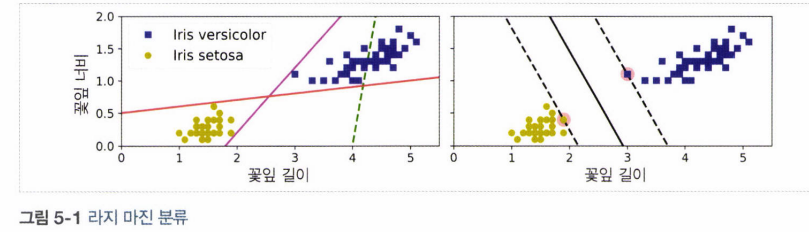

- SVM의 핵심 매커니즘 : **클래스를 분류하는데 결정경계에 가장 가까운 샘플로부터 최대한 멀리 떨어지자!** 이며 간단한 비유를 들자면 클래스 사이에 가장 폭이 넓은 도로를 찾는 것이므로 **라지 마진 분류라고도 한다.** 또한, 도로 바깥쪽(점선 밖)에 위치한 샘플들은 결정 경계에 영향을 미치지 않고, 도로 경계 부근에 위치한 샘플들에 의해 전적으로 결정되므로 이런 샘플들을 **서포트 벡터**라고 한다.

    - SVM은 feature의 스케일에 민감하므로 꼭 scaling을 해주어야 한다.
    
    - SVM은 predict_proba를 기본적으로 제공하지 않지만 하이퍼 파라미터 probability = True를 해준다면 predict_proba()를 제공한다.
    
- **마진** 

   - 마진은 여기서 가운데 실선 도로의 중앙(결정 경계)로부터 점선(차선)까지의 거리로 도로의 폭이라고 생각하면 된다.
   
## 5.1.1 소프트 마진 분류

1) 하드 마진 분류 : 모든 샘플들이 도로 바깥쪽에 올바르게 분류되어있을 때를 의미하며 여기에는 두 가지 문제점이 있다.

   - 데이터가 선형적으로 구분될 수 있어야 제대로 작동, 
    
   - 이상치에 민감
    
2) 소프트 마진 분류 : 도로의 폭을 가능한 넓게 유지하는 것과 마진 오류(샘플이 도로 중간이나 반대쪽에 위치하는 경우) 사이의 적절한 균형을 잡는 것.즉 어느정도의 오류는 허용하겠다는 것이다.
    
   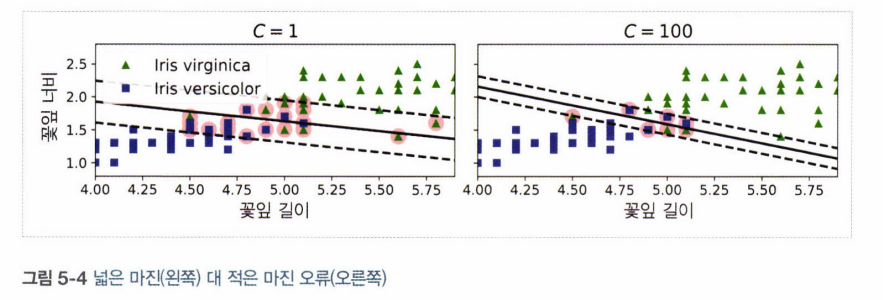
    
   - SVM 모델의 하이퍼 파라미터 C를 이용하여 마진을 넓게 가져갈지, 적게 가져갈지 정할 수 있다. 일반적으로는 마진 오류는 좋지 않기 때문에 적은 것이 좋으나 위 그림의 경우 왼쪽의 경우가 오류가 많더라도 일반화가 더 잘 될 거 같다.
   

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)), # 힌지 로스 사용
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [2]:
# 예측과정
svm_clf.predict([[5.5,1.7]])

array([1.])

In [ ]:
# - Linear SVC 클래스를 대신 선형 커널을 사용하는 SVC,SGDClassifier로 대체할 수 있다. 
LinearSVC(C= 1, loss = 'hinge')
SVC(kernel = 'linear',C=1)
SGDClassifier(loss = 'hinge',alpha = 1/(m*c)) # m은 샘플 수 
# SGDClassifier는 확률적 경사하강법을 사용하여 데이터셋이 클 경우 사용.

- Linear SVC는 규제에 편향을 포함시키기 때문에 훈련 세트에서 평균을 빼서 중앙에 맞춰줘야 하고, loss는 꼭 hinge로 지정해주어야 함.-> standard scaling을 꼭 하고 SVC 모델과 비교해야 함.
    
    - SVC는 규제에 편향을 포함하고 있지 않으므로 꼭 standard scaling을 해주어야 함.


- 만약 훈련 샘플보다 feature가 많지 않다면 성능을 높이기 위해서는 dual 하이퍼 파라미터를 False로 지정해야한다. -> 쌍대문제와 관련

## 5.2 비선형 SVM 분류

- 일반적으로 선형적으로 구분이 되지 않는 데이터는 Polynomial Feature를 추가한다면 비선형 분류가 가능해질 수 있다.


In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

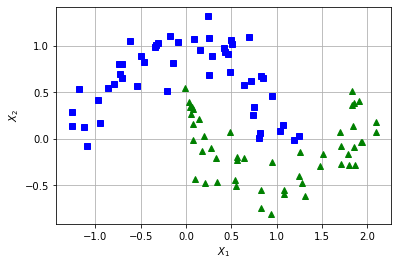

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

## 5.2.1 다항식 커널

- 다항식 특성(Polynomial Feature)를 추가하는 것은 효과적이나, 너무 작은 차수의 다항식은 복잡한 데이터를 표현하지 못하고 반대로 너무 높은 차수는 너무 많은 피처를 추가하므로 모델을 느리게 만든다.


- 커널 트릭 : 실제로 Polynomial Feature를 추가하지 않고서 비슷한 결과를 얻을 수 있으며 많은 수의 조합이 생겨나지 않는다.

In [16]:
# 커널 트릭 사용 예시
# 3차 다항식 커널을 사용해 SVM을 훈련
# coef는 다항식 커널에 있는 상수항 r으로, 고차항의 영향을 줄일 수 있다.
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # 단순히 kernel = poly 해주고, degree 적어주면 됨. coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절.
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

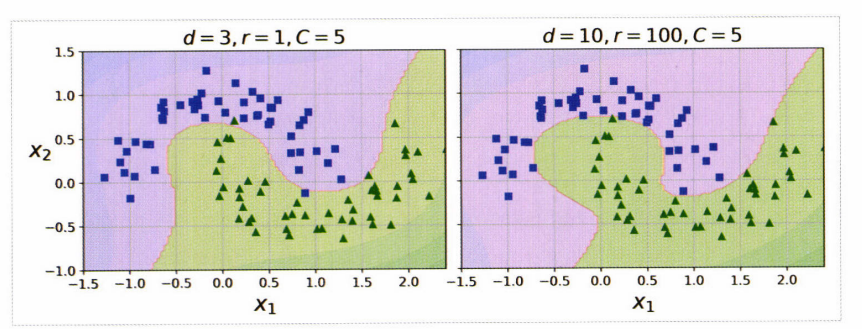

- 오른쪽 그림이 고차항의 영향을 더 많이 받게 해서 좀 더 비선형적으로 분류 되었다,

## 5.2.2 유사도 측정

- 각 샘플이 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 피처를 추가하면 비선형 분류가 가능하다. 이 때 가우시안 방사 기저 함수(radial basis function)(RBF)를 유사도 함수로 정의해서 사용한다면 아래 그림과 같다.

    - 가우시안 RBF : 랜드마크에서 아주 멀리 떨어진 경우 0 ~ 랜드마크와 같은 위치일 경우 1까지 변화하며 종 모양을 꼴로 나타난다. 식의 경우 exp(람다(랜드마크와의 거리차이)제곱)꼴 이다.
    
    - 그래서 아래쪽의 오른쪽 그림에서는 RBF를 이용하여 데이터를 변환시켜준다면 선형적으로 구분이 가능해진다.

    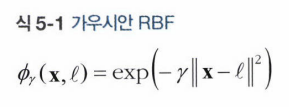

    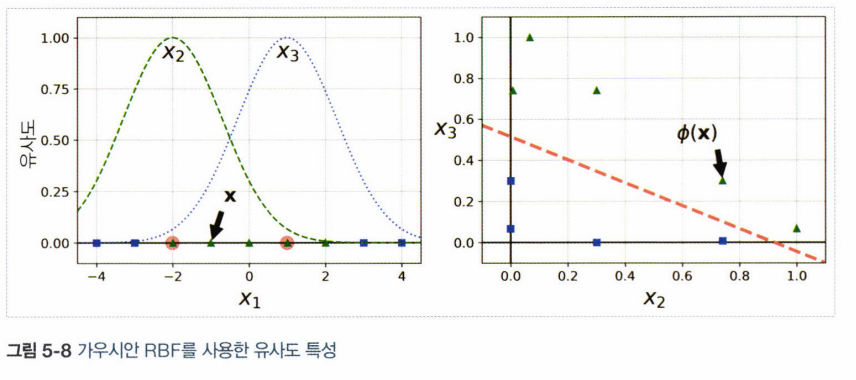
    
    
- 그렇다면 어떻게 랜드마크를 설정할까? 

    가장 간단한 방법은 모든 샘플 위치 하나하나 랜드마크를 설정해보는 것이다. 
    
    1) 장점 : 이렇게 하면 차원이 매우 커지고 변환된 데이터가 선형적으로 구분될 가능성이 높다.
    
    2) 단점 : mxn 샘플이 m x m의 샘플로 변환되어 매우 많은 피처들이 생성되어진다.
    
    

In [18]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) # rbf 사용
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

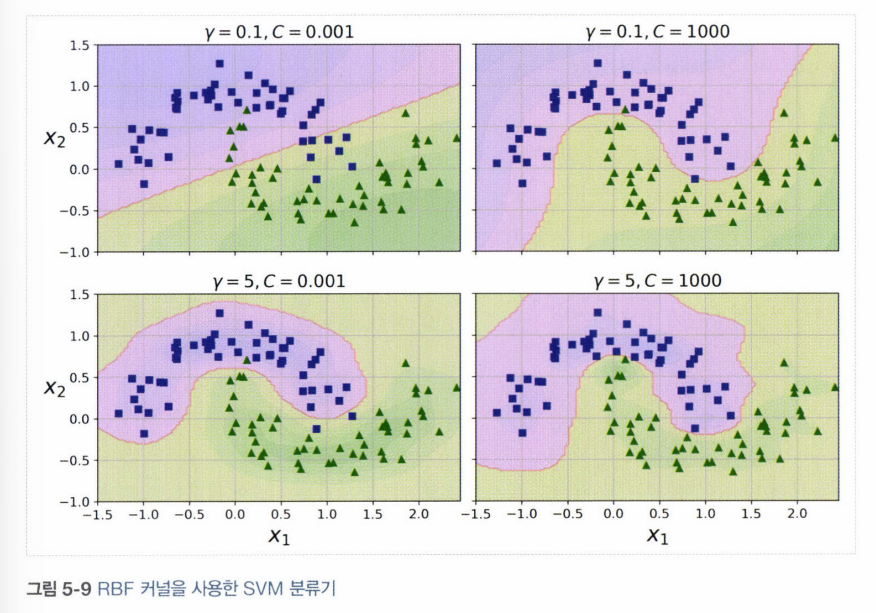

- RBF를 사용하게 되었을 때 하이퍼 파라미터인 gamma와 C를 조절해 위의 그래프와 같은 형태로 만들 수 있다.

    - gamma를 증가시키면 정규분포꼴 그래프가 좁아져서 결정경계가 좀 더 불규칙하고 구불구불해지고 샘플의 영향 범위가 작아진다.
    
    - gamma를 감소시키면 넓은 종 모양 그래프를 만들어 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 부드러워진다. 
    
    **결국 gamma 값들은 일종의 규제 역할과 동일하다.**
    
    
- 여러가지 커널 중 어떤 것을 사용해야할까?

    - Linear(가장 빠름) -> `LinearSVC > SVC(kernel = 'linear')`
    
    - 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 사용
    

- 다른 커널들의 종류 : 문자열 커널 , 문자열 서브시퀀스 커널이나 레벤슈타인 거리 기반의 커널 -> 잘 사용되지는 않음.

## 5.2.4 계산 복잡도

- LinearSVC는 커널 트릭을 사용하지 않기 때문에 $O(mxn)$정도로 선형적으로 늘어난다.

- SVC는 커널 트릭 알고리즘을 구현했기 때문에 $O(m^2 x n) 과 O(m^3 x n)$ 사이이다.즉, 훈련 샘플이 늘어날수록 엄청나게 계산량이 많아져 느려지므로 **중간이나 작은 규모의 훈련 세트에 이 알고리즘이 잘 맞는다.** 

   그러나 피처 관점에서는 sparse 한 feature들이 많은 경우에 잘 확장됨? 그래서 알고리즘의 성능이 샘플이 가진 non-sparse feature의 평균 개수에 거의 비례한다.
   
   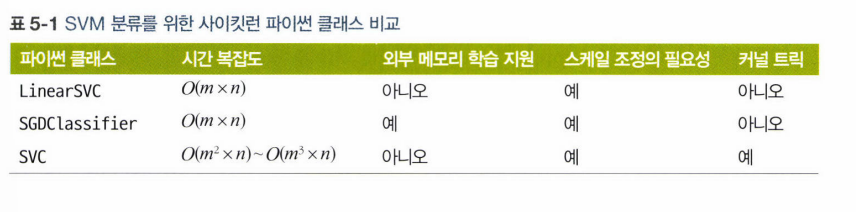

## 5.3 SVM 회귀

- SVM을 회귀에 사용한다면 도로의 폭이 최대로 하는 대신 **폭 안에 가능한 많은 샘플들이 들어가도록 학습한다.** 도로의 폭은 하이퍼파라미터 $\epsilon$로 조절한다. 아래 그림은 마진을 크게 할지 작게 할지 조절한 결과이다.

    - 허용오차를 설명할 때 나온 앱실론과는 다른 앱실론이다. SVM 회귀 모델인 SVR과 LinearSVR에서 허용오차는 tol, 도로의 폭은 epsilon 매개변수로 지정한다.
    
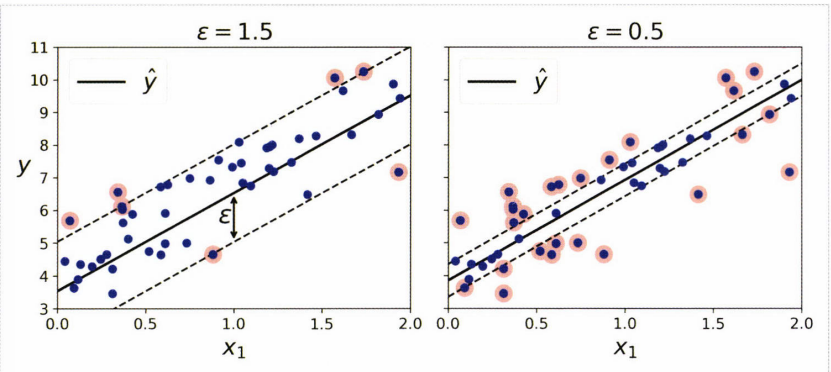


   그래서 마진 안에는 데이터들이 추가되어도 모델의 예측에는 영향이 없어 **epsilon에 민감하지 않다**라고 말한다.
   
 

In [19]:
# 선형 SVM 회귀를 적용.
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

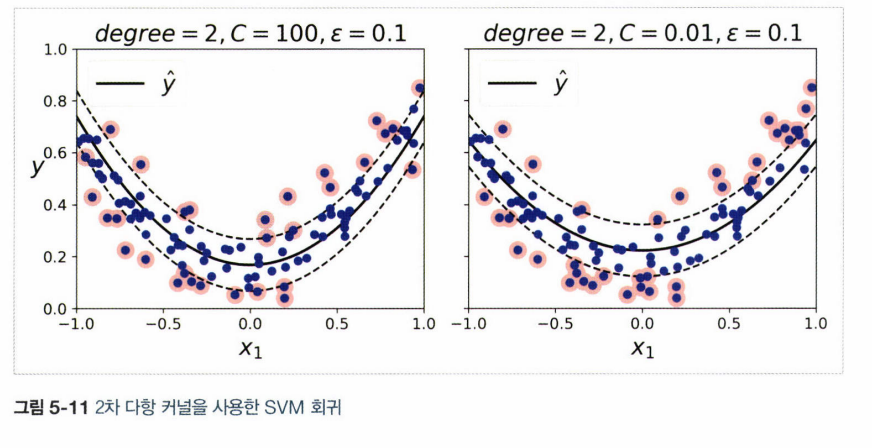

- C가 크다면 규제가 거의 없고, C가 작다면 규제가 훨씬 많다

In [20]:
# 커널 트릭을 제공하는 SVR
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

## 5.4 SVM 이론